In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# set the filepath and load in a shapefile

fp = "inProgress_bbl_with_nta_shapes/bbl_with_nta.shp"
inProgressNTA_df = gpd.read_file(fp)
inProgressNTA_df.dtypes

boro_code      float64
boro_name       object
county_fip      object
ntacode         object
ntaname         object
shape_area     float64
shape_leng     float64
index_righ       int64
City Counc       int64
Agency          object
Site            object
Address         object
Borough         object
Environmen      object
Estimated       object
Percentage      object
Estimate_1      object
Percenta_1     float64
Estimate_2      object
Estimate_3      object
Estimate_4      object
Financing       object
BBL              int64
bin            float64
built_code      object
cnstrct_yr     float64
doitt_id       float64
feat_code      float64
groundelev     float64
heightroof     float64
date_lstmo      object
time_lstmo      object
lststatype      object
name            object
num_floors     float64
shape_ar_1     float64
shape_len      float64
sub_code       float64
geometry      geometry
dtype: object

In [3]:
fp2 = "nta_shapes/geo_export_b178036e-3432-48fd-8da3-c2f1ca72d2d1.shp"
nta_df = gpd.read_file(fp2)

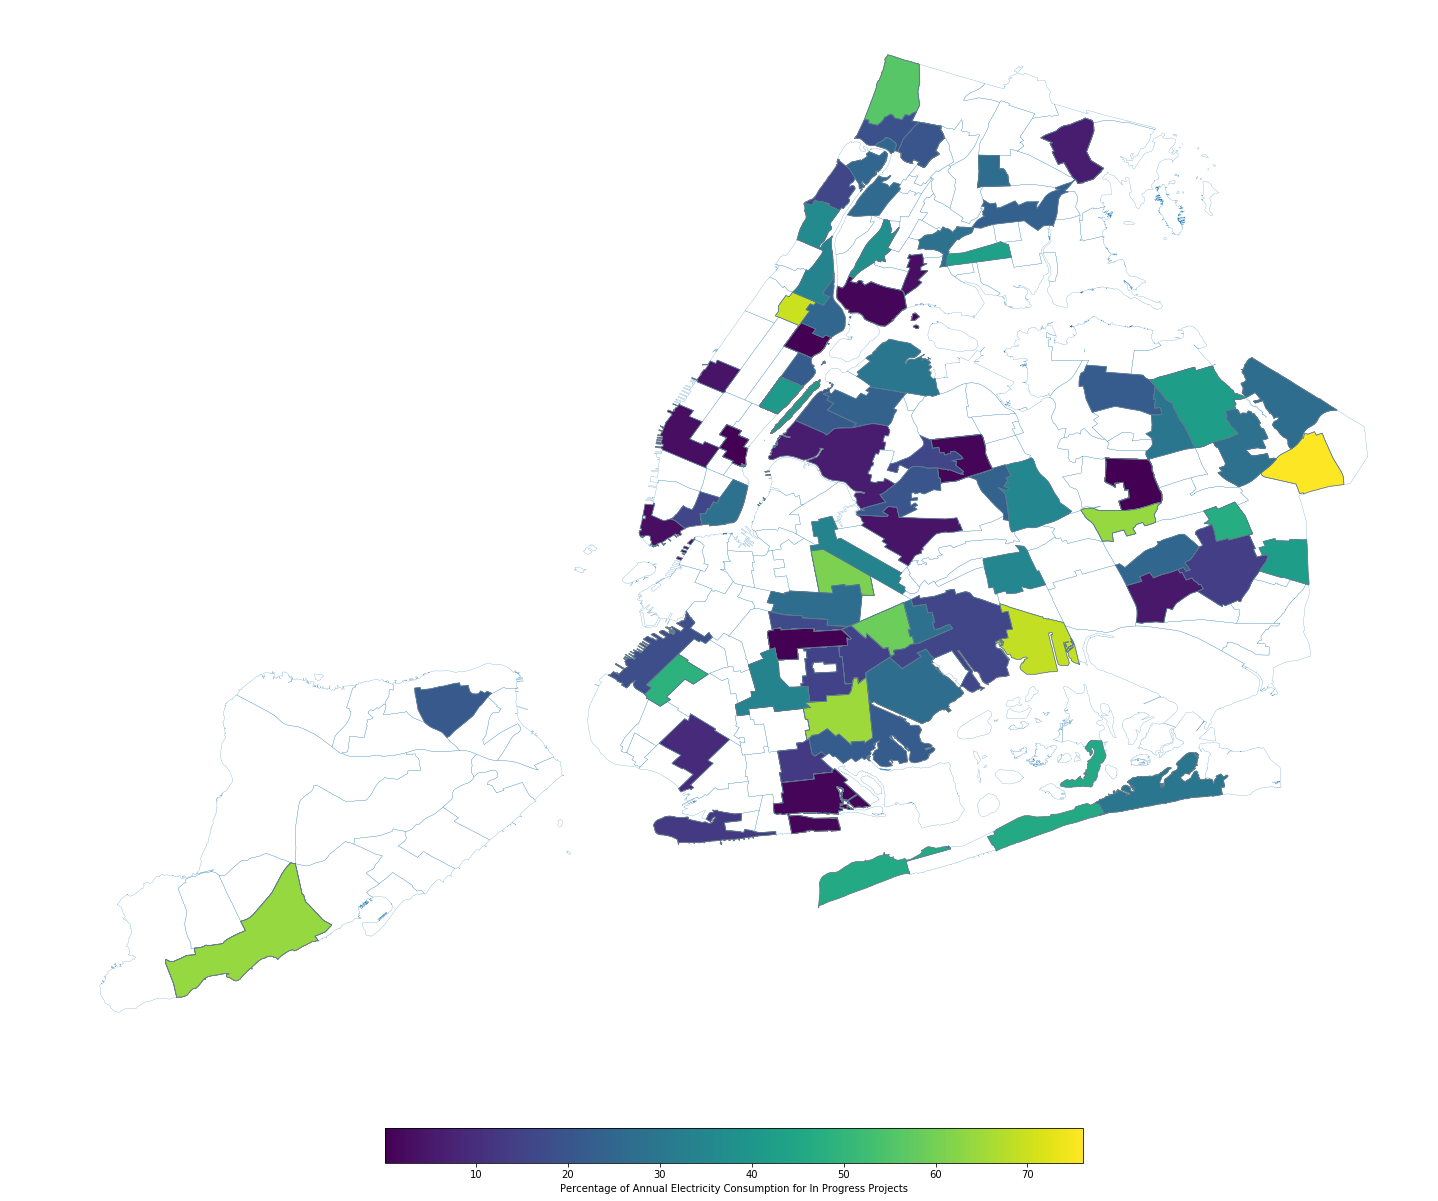

In [4]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Percenta_1'

# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 25))

ax.axis('off')

legend_kwds={'label': "Percentage of Annual Electricity Consumption for In Progress Projects",'shrink': 0.5, 'orientation':'horizontal', 'pad':0.05}
nta_df.boundary.plot( ax = ax, linewidth=0.2 )
inProgressNTA_df.plot(variable, linewidth=0.8, ax=ax, edgecolor='0.5', legend=True, legend_kwds=legend_kwds)
plt.savefig('Percentage of Annual Electricity Consumption for In Progress Projects.png')

In [ ]:
inProgressNTA_df.head()

In [ ]:
inProgressNTA_df['Estimate_2'] = inProgressNTA_df['Estimate_2'].astype(str).str.replace(' MT CO2', '').astype(int)

In [ ]:
inProgress_Boro_CO2_Reduction = inProgressNTA_df.groupby('boro_name')['Estimate_2'].sum().sort_values()


In [ ]:
plt.bar(inProgress_Boro_CO2_Reduction.index, inProgress_Boro_CO2_Reduction)
plt.ylabel('Estimated Annual Emissions Reduction (MT CO2)')


In [ ]:
inProgressNTA_df['Estimate_1'] = inProgressNTA_df['Estimate_1'].astype(str).str.replace(' kWh', '').str.replace(',','').astype(int)

In [ ]:
inProgress_Boro_Est_Annual_Prod = inProgressNTA_df.groupby('boro_name')['Estimate_1'].sum().div(1000000).sort_values()
inProgress_Boro_Est_Annual_Prod

In [ ]:
fig, ax = plt.subplots()
ax.bar(inProgress_Boro_Est_Annual_Prod.index, inProgress_Boro_Est_Annual_Prod)
ax.set_ylabel('Estimated Annual Production (GWh)')
plt.savefig('Per Borough Estimated Annual Production (GWh).png')

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Estimate_2'

# # set the range for the choropleth
# vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig2, ax2 = plt.subplots(1, figsize=(25, 25))

ax2.axis('off')

legend_kwds={'label': "Estimated Annual Emissions Reduction (MT CO2)",'shrink': 0.5, 'orientation':'horizontal', 'pad':0.05}
nta_df.boundary.plot( ax = ax2, linewidth=0.2 )
inProgressNTA_df.plot(variable, linewidth=0.8, ax=ax2, edgecolor='0.5', legend=True, legend_kwds=legend_kwds)
plt.savefig('Estimated Annual Emissions Reduction (MT CO2) for In Progress Projects.png')

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Estimate_1'

# # set the range for the choropleth
# vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig3, ax3 = plt.subplots(1, figsize=(25, 25))

ax3.axis('off')

legend_kwds={'label': "Estimated Annual Production (kWh)",'shrink': 0.5, 'orientation':'horizontal', 'pad':0.05}
nta_df.boundary.plot( ax = ax3, linewidth=0.2 )
inProgressNTA_df.plot(variable, linewidth=0.8, ax=ax3, edgecolor='0.5', legend=True, legend_kwds=legend_kwds)
plt.savefig('Estimated Annual Production (kWh) for In Progress Projects.png')